In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import itertools
import random
import warnings
warnings.simplefilter("ignore")

# ドミノ・タイリング

In [2]:
board1 = [(0,0), (0,1), (0,2), (0,3), (0,4),
          (1,0), (1,1), (1,2), (1,3), (1,4),
          (2,0), (2,1), (2,2), (2,3), (2,4),
          (3,0), (3,1), (3,2), (3,3), (3,4),
          (4,0), (4,1), (4,2), (4,3), (4,4),
          (5,0), (5,1), (5,2), (5,3), (5,4)]

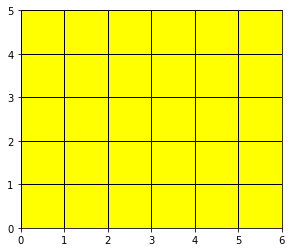

In [3]:
fig = plt.figure()
ax = plt.axes()
for s in board1:
    ax.add_patch(patches.Rectangle(xy=s, width=1, height=1, fc='yellow', ec='black'))
ax.set_aspect('equal')
ax.set_xlim(left=0, right=6)
ax.set_ylim(bottom=0, top=5)
plt.show()

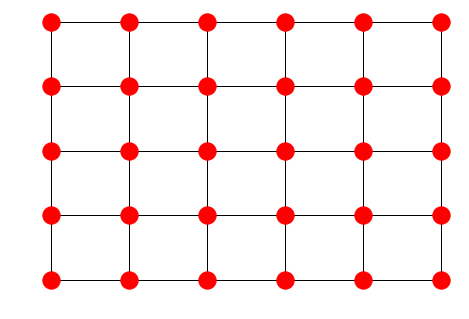

In [4]:
# 二部グラフの構成
G1 = nx.Graph()
G1.add_nodes_from(board1)
pos1 = {c: (c[0]+0.5, c[1]+0.5) for c in board1}
el = []
for c in board1:
    directions = [(+1,0), (-1,0), (0,+1), (0,-1)]
    for d in directions:
        if (c[0]+d[0], c[1]+d[1]) in board1:
            el.append((c,(c[0]+d[0], c[1]+d[1])))
G1.add_edges_from(el)
nx.draw(G1, pos=pos1)

In [5]:
M1 = nx.max_weight_matching(G1)
M1

{((0, 1), (1, 1)),
 ((0, 3), (1, 3)),
 ((1, 0), (0, 0)),
 ((1, 2), (0, 2)),
 ((1, 4), (0, 4)),
 ((2, 3), (3, 3)),
 ((3, 0), (2, 0)),
 ((3, 1), (2, 1)),
 ((3, 2), (2, 2)),
 ((3, 4), (2, 4)),
 ((4, 2), (5, 2)),
 ((4, 3), (5, 3)),
 ((5, 0), (4, 0)),
 ((5, 1), (4, 1)),
 ((5, 4), (4, 4))}

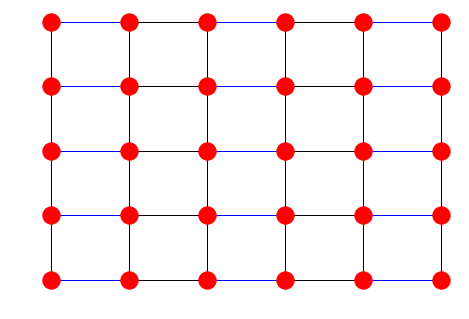

In [6]:
def edgecolor(graph, edgelist, color):
    return list(map(lambda e: color if e in edgelist or e[::-1] in edgelist else 'black', graph.edges()))
nx.draw(G1, pos=pos1, edge_color = edgecolor(G1, M1, 'blue'))

In [7]:
board2 = [(0,2), (0,3), (0,4),
          (1,2), (1,3), (1,4), (1,5),
          (2,1), (2,2), (2,4), (2,5),
          (3,0), (3,1), (3,2), (3,3), (3,4), (3,5),
          (4,0), (4,1), (4,2), (4,3), (4,4), 
          (5,0), (5,1), (5,2), (5,3), (5,4),
          (6,1), (6,2), (6,3)]

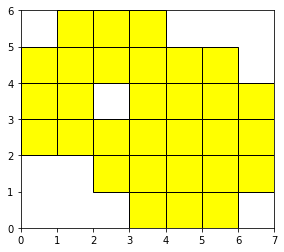

In [8]:
fig = plt.figure()
ax = plt.axes()
for s in board2:
    ax.add_patch(patches.Rectangle(xy=s, width=1, height=1, fc='yellow', ec='black'))
ax.set_aspect('equal')
ax.set_xlim(left=0, right=7)
ax.set_ylim(bottom=0, top=6)
plt.show()

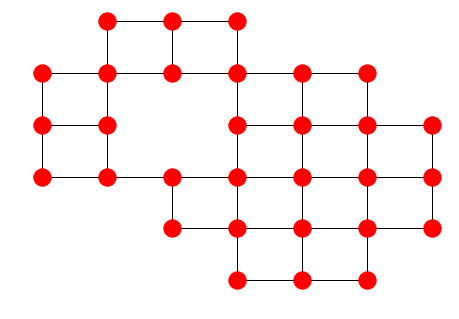

In [9]:
# 二部グラフの構成
G2 = nx.Graph()
G2.add_nodes_from(board2)
pos2 = {c: (c[0]+0.5, c[1]+0.5) for c in board2}
el = []
for c in board2:
    directions = [(+1,0), (-1,0), (0,+1), (0,-1)]
    for d in directions:
        if (c[0]+d[0], c[1]+d[1]) in board2:
            el.append((c,(c[0]+d[0], c[1]+d[1])))
G2.add_edges_from(el)
nx.draw(G2, pos=pos2)

# トランプ・マジック？

In [10]:
# 52枚のカードを作成 (ランダムにシャッフル)
ranks = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
suits = ['S', 'H', 'D', 'C']
cards = list(itertools.product(ranks, suits)) # itertools を import する
random.shuffle(cards) # random を import する

In [11]:
# 4枚ずつの組に分ける
groups = list(zip(*[iter(cards)]*4))

In [12]:
# 組分け結果の表示
for i in range(0,13):
    print(groups[i])

(('9', 'S'), ('K', 'S'), ('Q', 'H'), ('6', 'D'))
(('6', 'S'), ('10', 'H'), ('6', 'H'), ('7', 'C'))
(('8', 'H'), ('2', 'H'), ('3', 'C'), ('3', 'H'))
(('A', 'S'), ('7', 'H'), ('2', 'S'), ('A', 'C'))
(('3', 'S'), ('7', 'D'), ('10', 'C'), ('Q', 'D'))
(('K', 'C'), ('5', 'C'), ('J', 'S'), ('K', 'H'))
(('9', 'C'), ('A', 'D'), ('8', 'D'), ('Q', 'C'))
(('K', 'D'), ('Q', 'S'), ('10', 'S'), ('4', 'D'))
(('A', 'H'), ('4', 'C'), ('8', 'S'), ('4', 'S'))
(('5', 'H'), ('3', 'D'), ('2', 'D'), ('J', 'H'))
(('6', 'C'), ('8', 'C'), ('7', 'S'), ('5', 'D'))
(('J', 'D'), ('5', 'S'), ('9', 'D'), ('2', 'C'))
(('4', 'H'), ('9', 'H'), ('J', 'C'), ('10', 'D'))


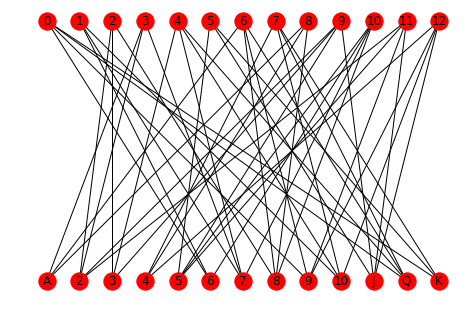

In [13]:
# 二部グラフの構成
G3 = nx.Graph()
G3.add_nodes_from(list(range(0,len(groups))))
G3.add_nodes_from(ranks)
for i in range(0,len(groups)):
    for c in groups[i]:
        G3.add_edge(i, c[0])
mypos3 = {}
for i in range(0, len(groups)):
    mypos3[i] = (10*i, 20)
for i in range(0, len(ranks)):
    mypos3[ranks[i]] = (10*i, 10)
nx.draw(G3, pos = mypos3, with_labels = True)

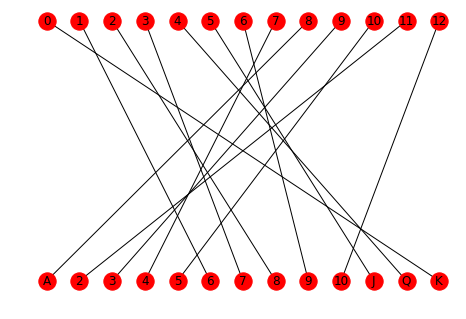

In [14]:
# 最大マッチングの計算と描画 (最大マッチングは完全マッチングになる)
m3 = nx.max_weight_matching(G3)
G3m = nx.Graph()
G3m.add_nodes_from(list(range(0,len(groups))))
G3m.add_nodes_from(ranks)
for e in m3:
    G3m.add_edge(*e)
nx.draw(G3m, pos = mypos3, with_labels=True)

In [15]:
# 完全マッチングによって選ばれたカードの表示
for e in G3m.edges():
    for c in groups[e[0]]:
        if c[0] == e[1]:
            print('{0} in {1}'.format(c, groups[e[0]]))
            break

('K', 'S') in (('9', 'S'), ('K', 'S'), ('Q', 'H'), ('6', 'D'))
('6', 'S') in (('6', 'S'), ('10', 'H'), ('6', 'H'), ('7', 'C'))
('8', 'H') in (('8', 'H'), ('2', 'H'), ('3', 'C'), ('3', 'H'))
('7', 'H') in (('A', 'S'), ('7', 'H'), ('2', 'S'), ('A', 'C'))
('Q', 'D') in (('3', 'S'), ('7', 'D'), ('10', 'C'), ('Q', 'D'))
('J', 'S') in (('K', 'C'), ('5', 'C'), ('J', 'S'), ('K', 'H'))
('9', 'C') in (('9', 'C'), ('A', 'D'), ('8', 'D'), ('Q', 'C'))
('4', 'D') in (('K', 'D'), ('Q', 'S'), ('10', 'S'), ('4', 'D'))
('A', 'H') in (('A', 'H'), ('4', 'C'), ('8', 'S'), ('4', 'S'))
('3', 'D') in (('5', 'H'), ('3', 'D'), ('2', 'D'), ('J', 'H'))
('5', 'D') in (('6', 'C'), ('8', 'C'), ('7', 'S'), ('5', 'D'))
('2', 'C') in (('J', 'D'), ('5', 'S'), ('9', 'D'), ('2', 'C'))
('10', 'D') in (('4', 'H'), ('9', 'H'), ('J', 'C'), ('10', 'D'))
